In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np
import scipy.signal

import warnings
warnings.filterwarnings('ignore')

PI2 = 2 * np.pi

np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

Exercise: In this chapter I claimed that the Fourier transform of a Gaussian curve is also a Gaussian curve. For discrete Fourier transforms, this relationship is approximately true.
Try it out for a few examples. What happens to the Fourier transform as you vary std?

Solution: I'll start with a Gaussian similar to the example in the book.

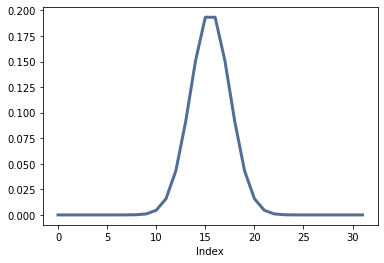

In [2]:
gaussian = scipy.signal.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
thinkplot.plot(gaussian)
thinkplot.config(xlabel='Index')

Here's what the FFT looks like:

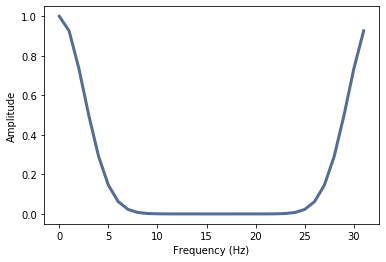

In [3]:
fft_gaussian = np.fft.fft(gaussian)
thinkplot.plot(abs(fft_gaussian))
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

If we roll the negative frequencies around to the left, we can see more clearly that it is Gaussian, at least approximately.

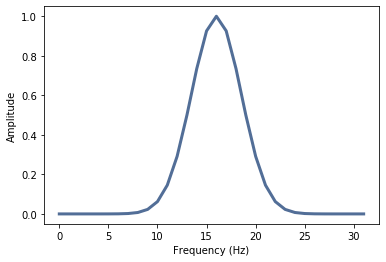

In [4]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
thinkplot.plot(abs(fft_rolled))
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

This function plots the Gaussian window and its FFT side-by-side.

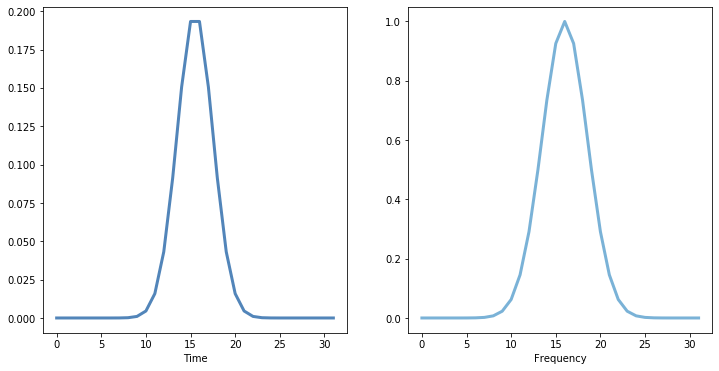

In [5]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    thinkplot.preplot(num=2, cols=2)
    thinkplot.plot(gaussian)
    thinkplot.config(xlabel='Time', legend=False)

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    thinkplot.subplot(2)
    thinkplot.plot(abs(fft_rolled))
    thinkplot.config(xlabel='Frequency')

    
plot_gaussian(2)

Now we can make an interaction that shows what happens as std varies.

In [6]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

As std increases, the Gaussian gets wider and its FFT gets narrower.
In terms of continuous mathematics, if
𝑓(𝑥)=
𝑒
−𝑎
𝑥
2
f(x)=e−ax2
which is a Gaussian with mean 0 and standard deviation 
1/𝑎
1/a
, its Fourier transform is
𝐹(𝑘)=
𝜋
𝑎

⎯
⎯
⎯
√
𝑒
−
𝜋
2
𝑘
2
/𝑎
F(k)=πae−π2k2/a
which is a Gaussian with standard deviation 
𝑎/
𝜋
2
a/π2
. So there is an inverse relationship between the standard deviations of 
𝑓
f
and 
𝐹
F
.
For the proof, see http://mathworld.wolfram.com/FourierTransformGaussian.html

Exercise: If you did the exercises in Chapter 3, you saw the effect of the Hamming window, and some of the other windows provided by NumPy, on spectral leakage. We can get some insight into the effect of these windows by looking at their DFTs.
In addition to the Gaussian window we used in this window, create a Hamming window with the same size. Zero pad the windows and plot their DFTs. Which window acts as a better low-pass filter? You might find it useful to plot the DFTs on a log-
𝑦
y
 scale.
Experiment with a few different windows and a few different sizes.

Solution: Following the examples from the chapter, I'll create a 1-second wave sampled at 44.1 kHz.

In [7]:
signal = thinkdsp.SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

And I'll create a few windows. I chose the standard deviation of the Gaussian window to make it similar to the others.

In [8]:
M = 15
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [gaussian, blackman, hamming, hanning]
names = ['gaussian', 'blackman', 'hamming', 'hanning']

for window in windows:
    window /= sum(window)

Let's see what the windows look like.

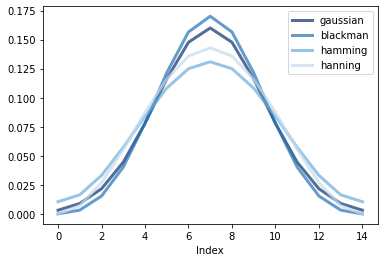

In [9]:
thinkplot.preplot(4)
for window, name in zip(windows, names):
    thinkplot.plot(window, label=name)

thinkplot.config(xlabel='Index', legend=True, loc='center bottom')

They are pretty similar. Let's see what their DFTs look like:

In [10]:
def plot_window_dfts(windows, names):
    thinkplot.preplot(5)

    for window, name in zip(windows, names):
        padded = thinkdsp.zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        thinkplot.plot(abs(dft_window), label=name)

Also pretty similar, but it looks like Hamming drops off the fastest, Blackman the slowest, and Hanning has the most visible sidelobes.

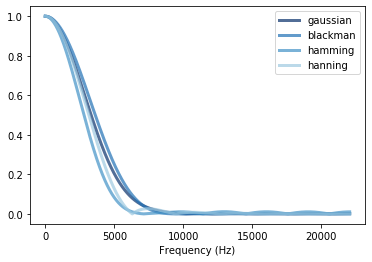

In [11]:
plot_window_dfts(windows, names)
thinkplot.config(xlabel='Frequency (Hz)', loc='upper right')

On a log scale we can see that the Hamming and Hanning drop off faster than the other two at first. And the Hamming and Gaussian windows seem to have the most persistent sidelobes. The Hanning window seems to have the best combination of fast drop off and minimal sidelobes.

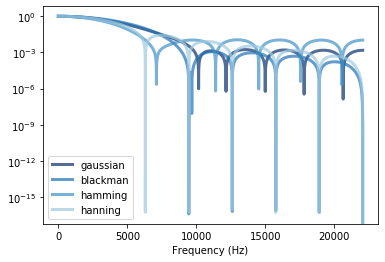

In [12]:
plot_window_dfts(windows, names)
thinkplot.config(xlabel='Frequency (Hz)', yscale='log', 
                 loc='lower left')

Type Markdown and LaTeX: 
𝛼
2
α2